In [3]:
library(dplyr)
library(rnaturalearth)
library(rnaturalearthdata)
library(ggplot2)
library(sf)
library(plotly)
library(ggthemes)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Linking to GEOS 3.10.2, GDAL 3.4.2, PROJ 8.2.1; sf_use_s2() is TRUE


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [4]:
suicides <- read.csv("https://raw.githubusercontent.com/popsnot/DATA201-Group-Project-2022/main/suicide-death-rates.csv") 
head(suicides) # reading csv directly from out github

,Entity,Code,Year,Deaths...Self.harm...Sex..Both...Age..Age.standardized..Rate.
,<chr>,<chr>,<int>,<dbl>
1,Afghanistan,AFG,1990,8.28
2,Afghanistan,AFG,1991,8.17
3,Afghanistan,AFG,1992,8.14
4,Afghanistan,AFG,1993,8.23
5,Afghanistan,AFG,1994,8.36
6,Afghanistan,AFG,1995,8.41


In [5]:
names(suicides) <- c('Country', 'Code', 'Year', 'Suicides_Per100k') #renaming
head(suicides)

,Country,Code,Year,Suicides_Per100k
,<chr>,<chr>,<int>,<dbl>
1,Afghanistan,AFG,1990,8.28
2,Afghanistan,AFG,1991,8.17
3,Afghanistan,AFG,1992,8.14
4,Afghanistan,AFG,1993,8.23
5,Afghanistan,AFG,1994,8.36
6,Afghanistan,AFG,1995,8.41


In [6]:
world <- ne_countries(scale = "medium", returnclass = "sf")
class(world)

[1] "sf"         "data.frame"

In [7]:
world = select(world, c(gu_a3, geometry)) # selecting chosen column

In [8]:
names(world) <- c('Code', 'Geometry') # merging by shared column
mergedDF = merge(suicides, world, by = "Code") %>%
  arrange(Year)

mergedDF

Code,Country,Year,Suicides_Per100k,Geometry
<chr>,<chr>,<int>,<dbl>,<MULTIPOLYGON [°]>
AFG,Afghanistan,1990,8.28,MULTIPOLYGON (((74.89131 37...
AGO,Angola,1990,17.59,MULTIPOLYGON (((14.19082 -5...
ALB,Albania,1990,4.10,MULTIPOLYGON (((20.06396 42...
AND,Andorra,1990,9.71,MULTIPOLYGON (((1.706055 42...
ARE,United Arab Emirates,1990,6.85,MULTIPOLYGON (((53.92783 24...
ARG,Argentina,1990,8.57,MULTIPOLYGON (((-64.54917 -...
ARM,Armenia,1990,3.37,MULTIPOLYGON (((45.55234 40...
ASM,American Samoa,1990,7.30,MULTIPOLYGON (((-170.7263 -...
ATG,Antigua and Barbuda,1990,2.34,MULTIPOLYGON (((-61.71606 1...


In [9]:
mergeDF_SF <- st_as_sf(mergedDF) # convert to sf object for plotting geometry
mergeDF_SF <- mergeDF_SF %>% 
  filter(Year == "2019" | Year == "1990") # filtering chosen years for comparison

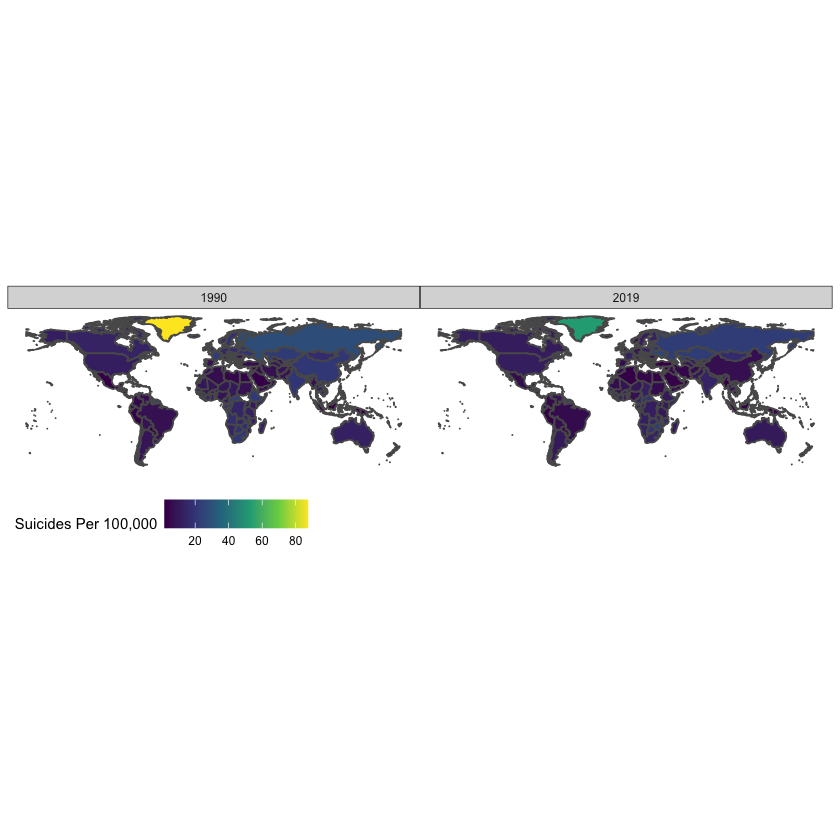

In [10]:
assoc_graph <- ggplot(data = mergeDF_SF) + # first comparative plot
  geom_sf(aes(fill = Suicides_Per100k), 
          position = "identity") + 
  labs(fill='Suicides Per 100,000')  +
  scale_fill_viridis_c(option = "viridis") +
  facet_grid(.~Year) # separate plot for each year
  
assoc_graph + theme_map() + theme(legend.position = "bottom")

In [11]:

merged_Countries <- mergeDF_SF %>% # filter for chosen countries
  filter(Country == "New Zealand" | Country == "South Korea" | Country == "Netherlands" | Country == "United States")


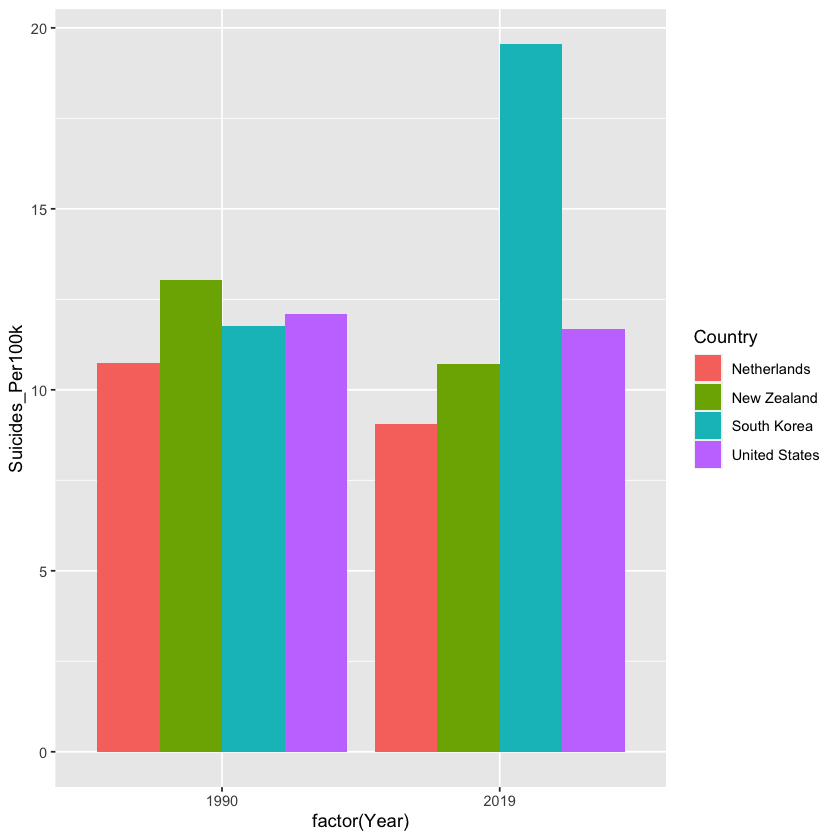

In [12]:
ggplot(merged_Countries,                                      # Grouped barplot using ggplot2
       aes(x = factor(Year),
           y = Suicides_Per100k,
           fill = Country)) +
  geom_bar(stat = "identity",
           position = "dodge")

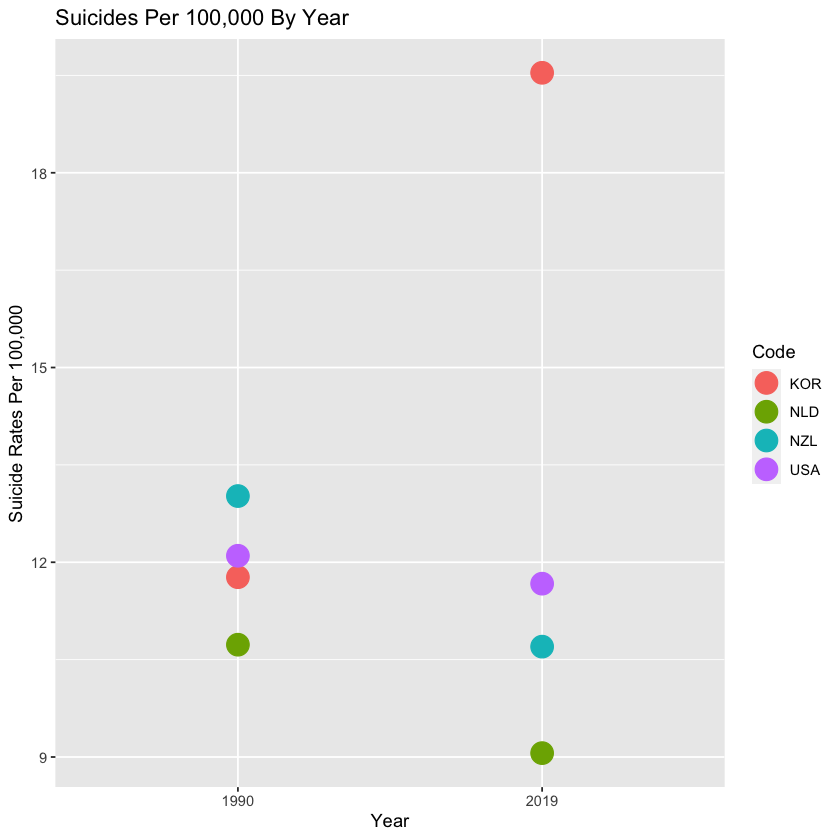

In [18]:
merged_Countries %>%
  ggplot( aes(factor(Year), Suicides_Per100k, color=Code, label= Country)) +
  geom_point(size = 6)+
  labs(title = "Suicides Per 100,000 By Year", x = "Year", y = "Suicide Rates Per 100,000")
